In [9]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data importation

In [11]:
df = pd.read_json("cleaned_automobile_propre_top10_forums.json")
df.head(10)

,marque,sous_marque,forum_id,forum_name,date,text,joined_text,n_words,cleaned_text,tokenized_text,tokenized_wo_stopwords
0,Dacia,Dacia Spring,38723,Mise à jour de la cartographie pour la navigation,2021-12-04 19:06:48,[\nJ'ai fait la mise à jour de la cartographie...,\nJ'ai fait la mise à jour de la cartographie ...,46,j ai fait la mise a jour de la cartographie co...,"[j, ai, fait, la, mise, a, jour, de, la, carto...","[fait, mise, jour, cartographie, comme, indiqu..."
1,Dacia,Dacia Spring,40101,Application My Dacia abonnement payant à prévoir?,2022-01-16 11:55:46,"[\nBonjour \n, \nDésolé pour le titre un peut ...","\nBonjour \n \nDésolé pour le titre un peut ""p...",151,bonjour desole pour le titre un peut putacli...,"[bonjour, desole, pour, le, titre, un, peut, p...","[bonjour, desole, titre, peut, putaclic, rendu..."
2,Dacia,Dacia Spring,40121,"Climatisation avec MY Dacia: ""Les conditions d...",2022-01-17 06:47:40,"[\nBonjour,\n, \nJ'ai voulu lancer une climati...","\nBonjour,\n \nJ'ai voulu lancer une climatisa...",109,bonjour j ai voulu lancer une climatisation d...,"[bonjour, j, ai, voulu, lancer, une, climatisa...","[bonjour, voulu, lancer, climatisation, spring..."
3,Dacia,Dacia Spring,39939,Option combo CCS DC 30kW,2022-01-12 00:57:22,[\nBonjour à tous je suis nouveau sur ce forum...,\nBonjour à tous je suis nouveau sur ce forum ...,226,bonjour a tous je suis nouveau sur ce forum et...,"[bonjour, a, tous, je, suis, nouveau, sur, ce,...","[bonjour, tous, nouveau, forum, viens, recepti..."
4,Dacia,Dacia Spring,38202,Customisation Spring,2021-11-19 21:01:43,[\nJ'ai vu la vidéo d'un bricoleur qui a ajout...,\nJ'ai vu la vidéo d'un bricoleur qui a ajouté...,82,j ai vu la video d un bricoleur qui a ajoute d...,"[j, ai, vu, la, video, d, un, bricoleur, qui, ...","[vu, video, bricoleur, ajoute, feux, leds, spr..."
5,Dacia,Dacia Spring,40183,Bruit trop fort en marche arrière,2022-01-18 14:29:33,"[\nBonjour,\n, \nQuand est il de ce bruit qui ...","\nBonjour,\n \nQuand est il de ce bruit qui re...",31,bonjour quand est il de ce bruit qui reveilla...,"[bonjour, quand, est, il, de, ce, bruit, qui, ...","[bonjour, quand, bruit, reveillait, tout, mond..."
6,Dacia,Dacia Spring,40120,Appli Dacia : parfois un peu chaotique ?,2022-01-17 06:13:35,"[\nBonjour,\n, \nCe matin , comportement un pe...","\nBonjour,\n \nCe matin , comportement un peu ...",28,bonjour ce matin comportement un peu etrang...,"[bonjour, ce, matin, comportement, un, peu, et...","[bonjour, matin, comportement, peu, etrange, a..."
7,Dacia,Dacia Spring,38205,Débrancher le haut parleur extérieur,2021-11-19 23:29:01,"[\nLe bruit extérieur est un peu désagréable, ...","\nLe bruit extérieur est un peu désagréable, s...",39,le bruit exterieur est un peu desagreable sur...,"[le, bruit, exterieur, est, un, peu, desagreab...","[bruit, exterieur, peu, desagreable, surtout, ..."
8,Dacia,Dacia Spring,40157,Changer l'intensité de charge du CRO de la Spr...,2022-01-17 19:47:45,"[\nBonjour,\n, \nc'est une demande inhabituell...","\nBonjour,\n \nc'est une demande inhabituelle,...",85,bonjour c est une demande inhabituelle mais ...,"[bonjour, c, est, une, demande, inhabituelle, ...","[bonjour, demande, inhabituelle, aimerais, red..."
9,Dacia,Dacia Spring,36751,Dacia Spring - Recharge au domicile,2021-10-06 08:25:53,"[\nBonjour,\n, \n \n, \nAvant d'avoir un sujet...","\nBonjour,\n \n \n \nAvant d'avoir un sujet au...",31,bonjour avant d avoir un sujet au sein la ...,"[bonjour, avant, d, avoir, un, sujet, au, sein...","[bonjour, avant, avoir, sujet, sein, charge, a..."


In [12]:
df.iloc[6]["text"]

['\nBonjour,\n',
 "\nCe matin , comportement un peu étrange de l'appli Dacia.\n",
 "\nElle m'indique 100% de batterie, la réalité c'est 62%.\n",
 "\nC'est rentré dans l'ordre un peu plus tard.\n",
 '\n\xa0\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n']

In [13]:
df.shape

(398199, 11)

# Sentiment analysis

## Module

In [10]:
!pip install vaderSentiment-fr
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
SIA = SentimentIntensityAnalyzer()
print(SIA.polarity_scores( "Une phrase très cool à analyser"))
SIA.polarity_scores("J'ai très très mal")

{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.2247}


{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'compound': -0.3119}

## Score calculus

In [29]:
dict = {}
for i, row in df.iterrows():
    if (row["marque"], row["sous_marque"]) in dict:
        dict[(row["marque"], row["sous_marque"])][0] += 1
        dict[(row["marque"], row["sous_marque"])][1] += SIA.polarity_scores(row["cleaned_text"])['compound']
    else:
        dict[(row["marque"], row["sous_marque"])] = [1, SIA.polarity_scores(row["cleaned_text"])['compound']]

In [30]:
dict

{('Dacia ', 'Dacia Spring'): [5371, 1330.0451000000016],
 ('Tesla ', 'Tesla Model 3'): [279187, 69102.16929999966],
 ('Renault ', 'Renault ZOE'): [10375, 3187.1639999999848],
 ('Fiat ', 'Fiat 500e'): [2231, 384.75060000000013],
 ('Renault ', 'Renault Twingo ZE'): [1247, 349.4220999999992],
 ('KIA ', 'KIA e-Niro électrique'): [42033, 8854.034000000242],
 ('Volkswagen ', 'Volkswagen ID3'): [21964, 5066.557200000087],
 ('Peugeot ', 'Peugeot e-2008 électrique'): [491, 132.77999999999992],
 ('Mini ', 'Mini Cooper SE'): [293, 92.16909999999997],
 ('Peugeot ', 'Peugeot e-208 électrique'): [35007, 6748.877200000088]}

In [31]:
scores = pd.DataFrame.from_dict(dict, orient='index', columns=['nb_reviews', 'total_score'])
scores

,nb_reviews,total_score
"(Dacia , Dacia Spring)",5371,1330.0451
"(Tesla , Tesla Model 3)",279187,69102.1693
"(Renault , Renault ZOE)",10375,3187.1640
"(Fiat , Fiat 500e)",2231,384.7506
"(Renault , Renault Twingo ZE)",1247,349.4221
"(KIA , KIA e-Niro électrique)",42033,8854.0340
"(Volkswagen , Volkswagen ID3)",21964,5066.5572
"(Peugeot , Peugeot e-2008 électrique)",491,132.7800
"(Mini , Mini Cooper SE)",293,92.1691
"(Peugeot , Peugeot e-208 électrique)",35007,6748.8772


## Normalization of the score

In [32]:
scores["mean"] = scores["total_score"]/scores["nb_reviews"]

In [33]:
scores

,nb_reviews,total_score,mean
"(Dacia , Dacia Spring)",5371,1330.0451,0.247635
"(Tesla , Tesla Model 3)",279187,69102.1693,0.247512
"(Renault , Renault ZOE)",10375,3187.1640,0.307197
"(Fiat , Fiat 500e)",2231,384.7506,0.172457
"(Renault , Renault Twingo ZE)",1247,349.4221,0.280210
"(KIA , KIA e-Niro électrique)",42033,8854.0340,0.210645
"(Volkswagen , Volkswagen ID3)",21964,5066.5572,0.230676
"(Peugeot , Peugeot e-2008 électrique)",491,132.7800,0.270428
"(Mini , Mini Cooper SE)",293,92.1691,0.314570
"(Peugeot , Peugeot e-208 électrique)",35007,6748.8772,0.192787


In [34]:
scores["normalized"] = (scores["mean"]-scores["mean"].mean())/scores["mean"].std()

In [35]:
scores

,nb_reviews,total_score,mean,normalized
"(Dacia , Dacia Spring)",5371,1330.0451,0.247635,0.004741
"(Tesla , Tesla Model 3)",279187,69102.1693,0.247512,0.002139
"(Renault , Renault ZOE)",10375,3187.1640,0.307197,1.270645
"(Fiat , Fiat 500e)",2231,384.7506,0.172457,-1.593058
"(Renault , Renault Twingo ZE)",1247,349.4221,0.280210,0.697089
"(KIA , KIA e-Niro électrique)",42033,8854.0340,0.210645,-0.781422
"(Volkswagen , Volkswagen ID3)",21964,5066.5572,0.230676,-0.355699
"(Peugeot , Peugeot e-2008 électrique)",491,132.7800,0.270428,0.489176
"(Mini , Mini Cooper SE)",293,92.1691,0.314570,1.427364
"(Peugeot , Peugeot e-208 électrique)",35007,6748.8772,0.192787,-1.160975


## Score plotting

<AxesSubplot:>

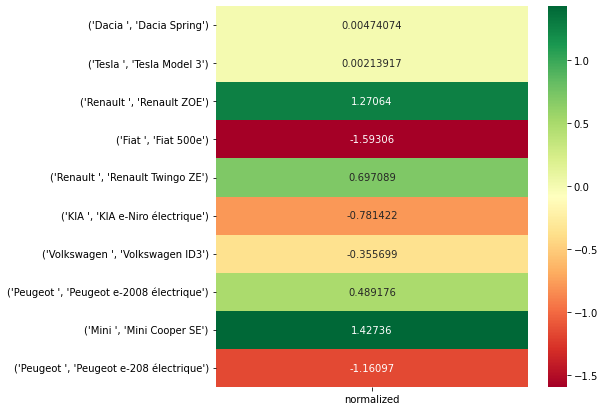

In [50]:
final_scores = pd.DataFrame(scores["normalized"])

plt.figure(figsize=(7, 7))
sns.heatmap(final_scores, annot=True, fmt="g", cmap='RdYlGn')